In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [2]:
auto_reg = pd.read_csv("monthly-us-auto-registration-tho.csv", delimiter=';').iloc[:,1]

Results of Dickey-Fuller Test:
Test Statistic                  -1.225039
p-value                          0.662733
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


C:\Users\aleksey.ilmetov\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


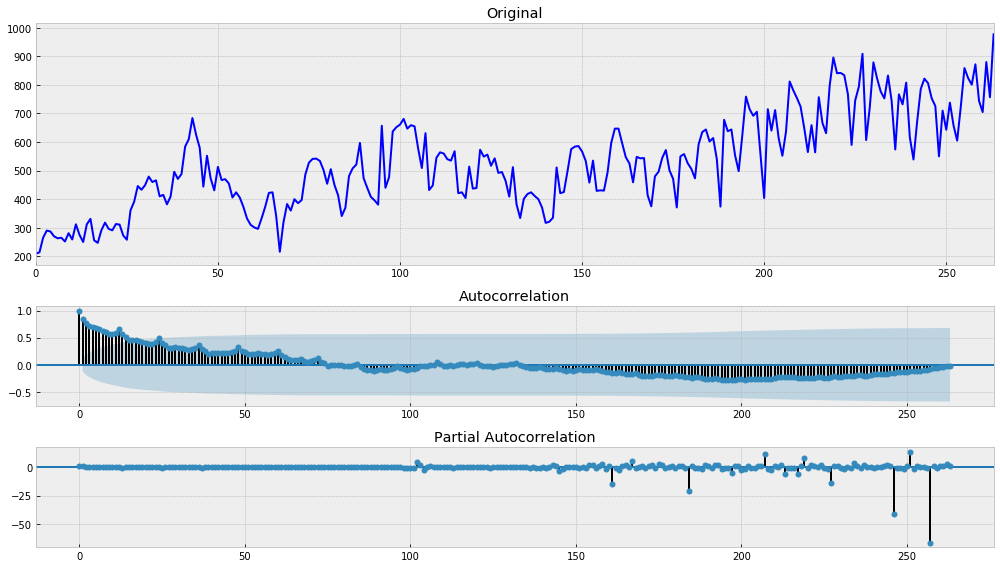

In [3]:
tsplot(auto_reg)

Results of Dickey-Fuller Test:
Test Statistic                  -1.889012
p-value                          0.337248
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


C:\Users\aleksey.ilmetov\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


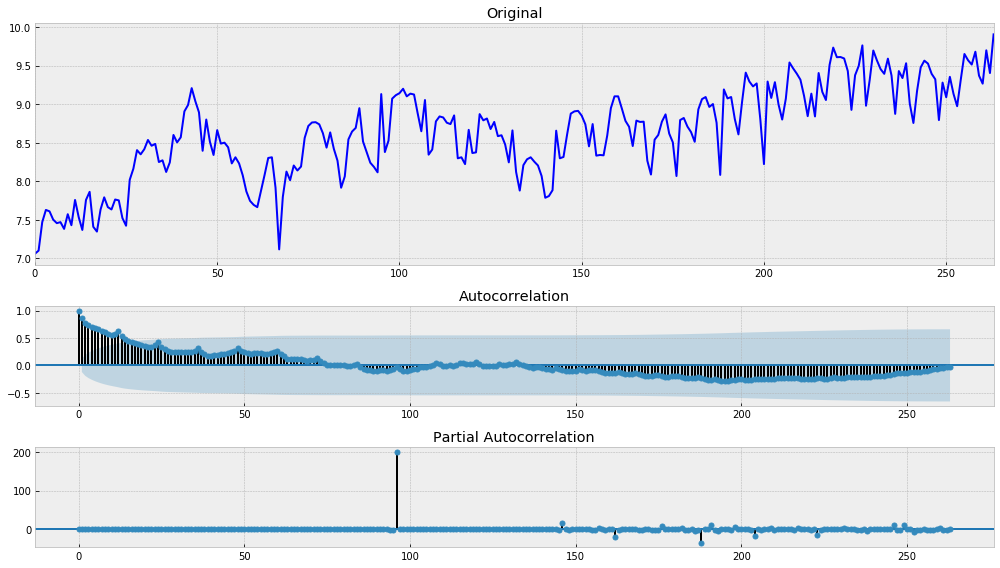

In [4]:
auto_reg = boxcox(auto_reg, 0.1)
tsplot(auto_reg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.348406
p-value                          0.000366
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


C:\Users\aleksey.ilmetov\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


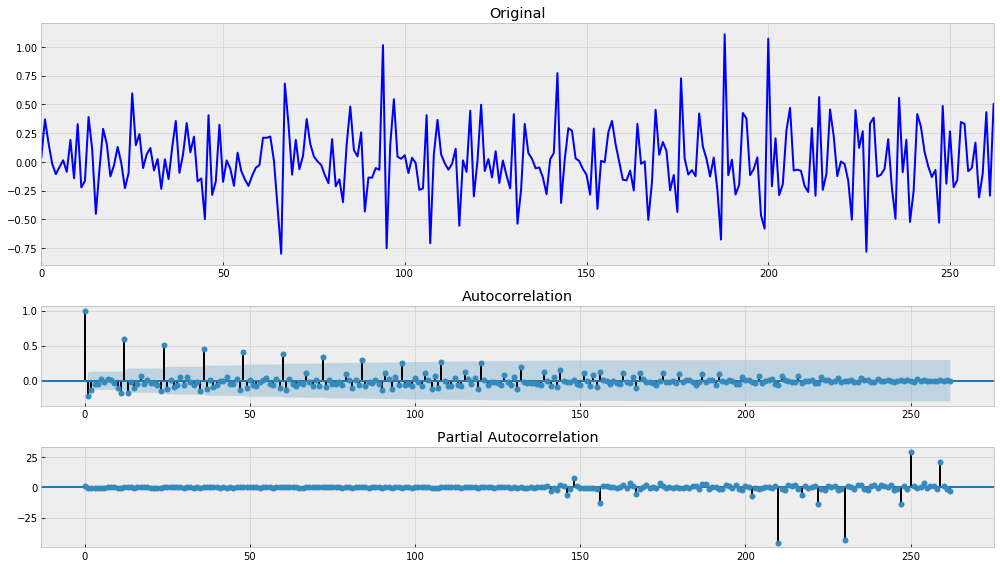

In [5]:
auto_reg = auto_reg[1:] - auto_reg[:-1]
tsplot(auto_reg)

##### Судя по тесту Дикки Фуллера данный ряд стал стационарным

In [6]:
dow_close = pd.read_csv("weekly-closings-of-the-dowjones-.csv", delimiter=',')
dow_close.head()

,Week,"Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974"
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


C:\Users\aleksey.ilmetov\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


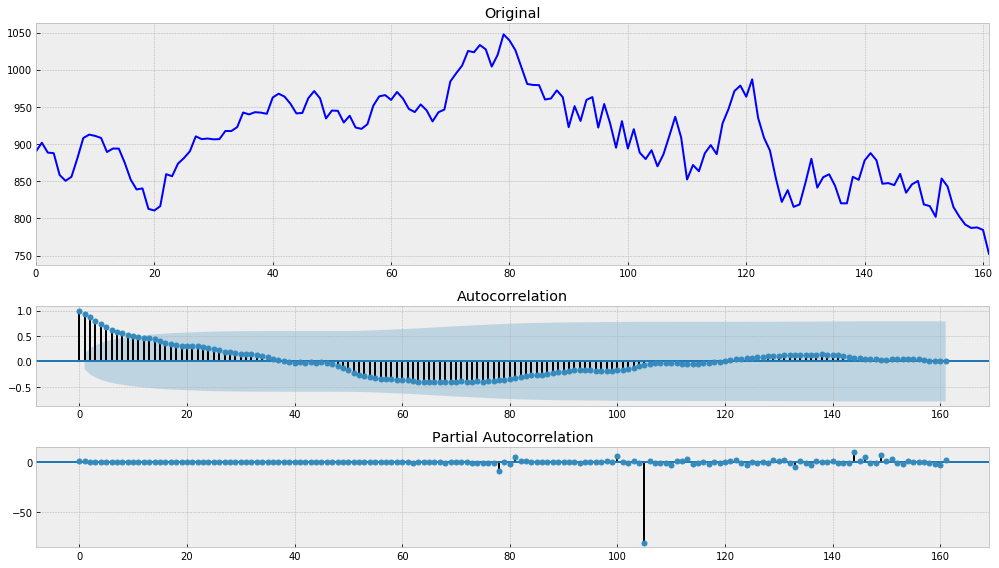

In [7]:
tsplot(dow_close.iloc[:,1])

Results of Dickey-Fuller Test:
Test Statistic                  -1.294529
p-value                          0.631672
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


C:\Users\aleksey.ilmetov\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


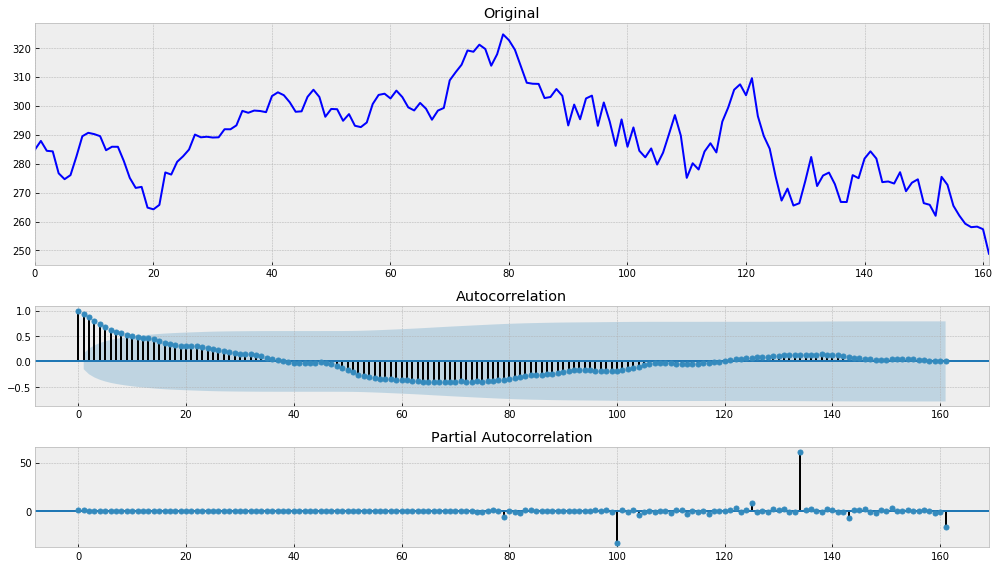

In [8]:
dow_close = boxcox(dow_close.iloc[:,1], 0.8)
tsplot(dow_close)

Results of Dickey-Fuller Test:
Test Statistic                -1.302104e+01
p-value                        2.453502e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


C:\Users\aleksey.ilmetov\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


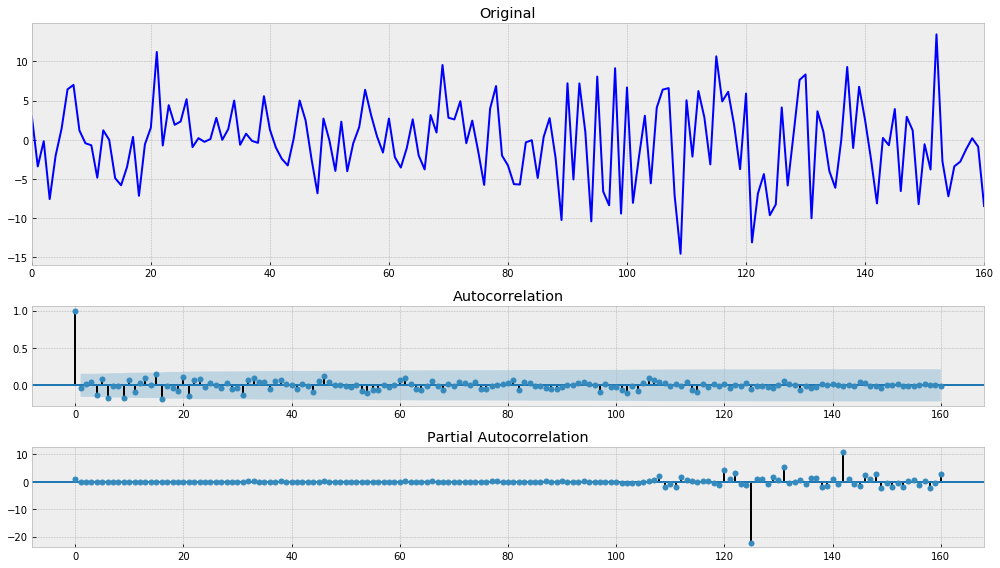

In [9]:
dow_close = dow_close[1:] - dow_close[:-1]
tsplot(dow_close)

##### Судя по тесту Дикки Фуллера данный ряд стал стационарным

### Moving Average

In [10]:
dow_stat = pd.DataFrame(dow_close)

In [11]:
dow_stat.columns = ['a']

In [12]:
dow_stat.head()

,a
0,2.981068
1,-3.413079
2,-0.187770
3,-7.575298
4,-2.027042


In [13]:
dow_non_stat = pd.read_csv("weekly-closings-of-the-dowjones-.csv", delimiter=',')

In [14]:
dow_non_stat = pd.DataFrame(dow_non_stat.iloc[:,1])

In [15]:
dow_non_stat.columns = ['a']

In [16]:
dow_non_stat.head()

,a
0,890.19
1,901.80
2,888.51
3,887.78
4,858.43


In [17]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [18]:
# MA нестационарного ряда

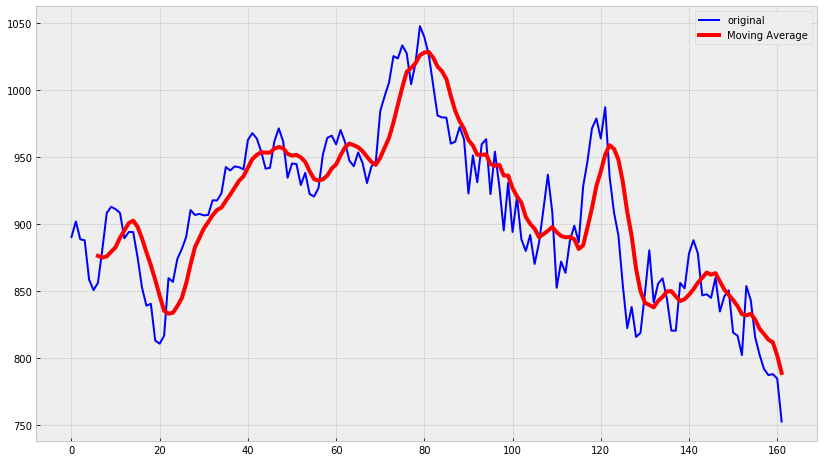

In [19]:
dow_ns_ma = moving_average(dow_non_stat["a"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(dow_non_stat["a"], color='blue',label='original')
    plt.plot(dow_ns_ma, color='red', linewidth='4', label='Moving Average')
    plt.legend()

In [20]:
# MA стационарного ряда

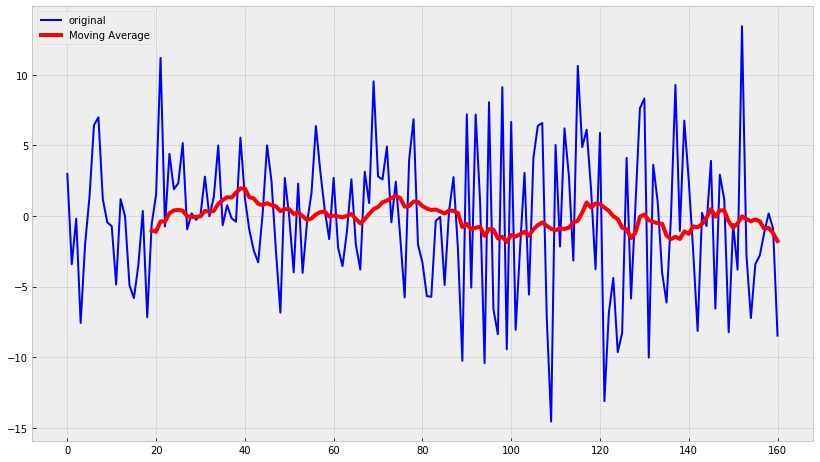

In [21]:
dow_s_ma = moving_average(dow_stat["a"], 20)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(dow_stat["a"], color='blue',label='original')
    plt.plot(dow_s_ma, color='red', linewidth='4', label='Moving Average')
    plt.legend()

In [22]:
# Prediction with basic MA

In [23]:
def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = new_series.append(pd.Series([new_series[-N:].mean()]), ignore_index=True)
    return new_series

In [24]:
#Predict MA stat

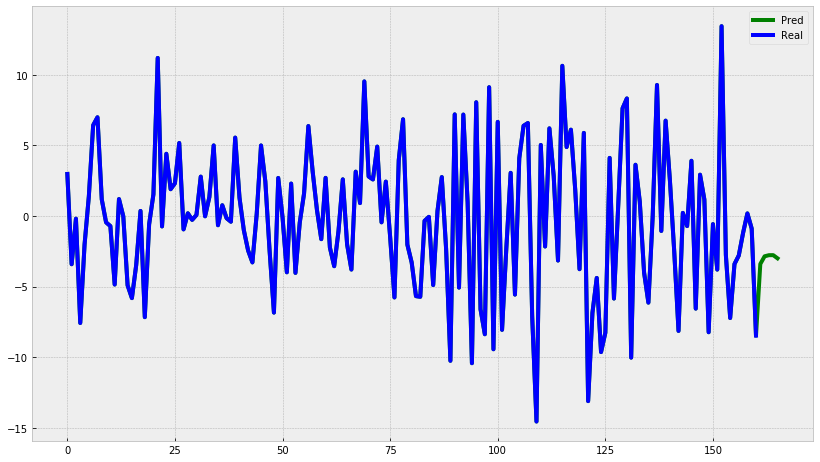

In [25]:
dow_s_mapred = predict(dow_stat["a"], 7, 5)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(dow_s_mapred, color='green', linewidth='4', label='Pred')
    plt.plot(dow_stat["a"], color='blue', linewidth='4', label='Real')
    plt.legend()

In [26]:
#Predict MA non stat

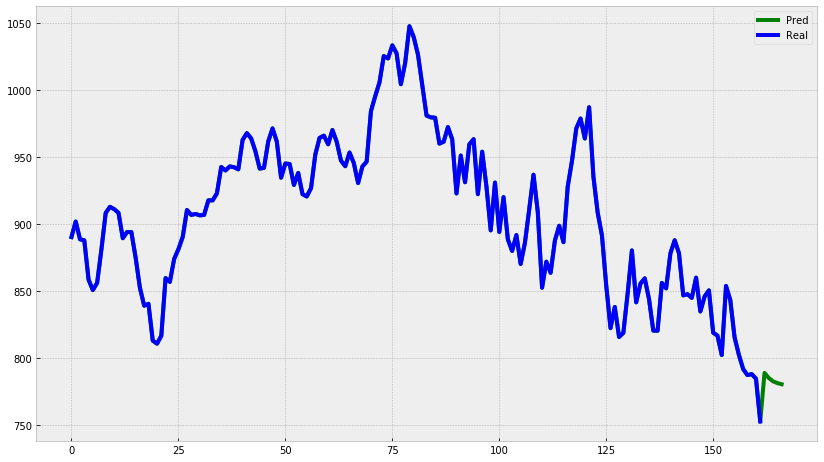

In [27]:
dow_ns_mapred = predict(dow_non_stat["a"], 7, 5)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(dow_ns_mapred, color='green', linewidth='4', label='Pred')
    plt.plot(dow_non_stat["a"], color='blue', linewidth='4', label='Real')
    plt.legend()

С учетом трендовости прогноз выглядит как-то не очень. На стационарном ряде вообще при увеличении точек прогноза он превращается в прямую линию

# weighted MA

In [28]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

In [29]:
# WMA non stationary

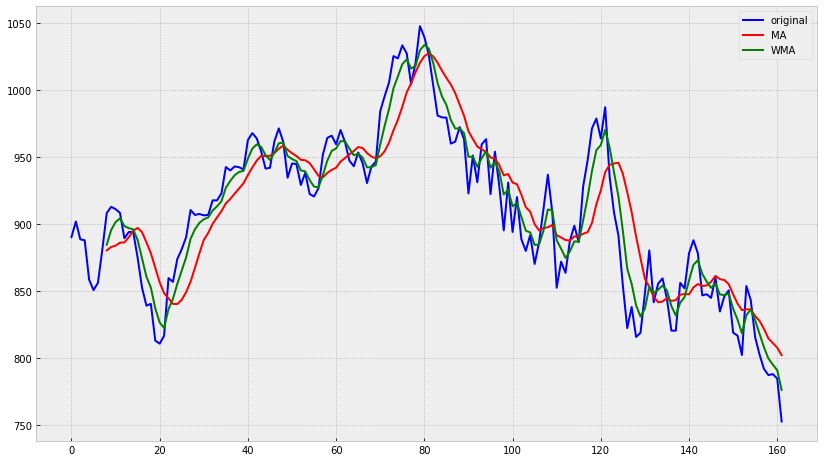

In [30]:
dow_ns_wma = weighted_moving_average(dow_non_stat["a"], 9, [1,1,2,3,5,8,13,21, 34])
dow_ns_ma = moving_average(dow_non_stat["a"], 9)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(dow_non_stat["a"], color='blue',label='original')
    plt.plot(dow_ns_ma, color='red', linewidth='2', label='MA')
    plt.plot(dow_ns_wma, color='green', linewidth='2', label='WMA')
    plt.legend()

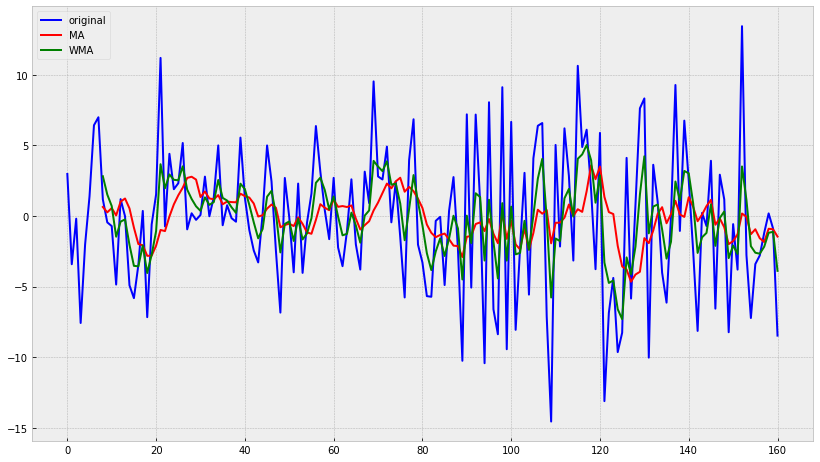

In [31]:
dow_s_wma = weighted_moving_average(dow_stat["a"], 9, [1,1,2,3,5,8,13,21, 34])
dow_s_ma = moving_average(dow_stat["a"], 9)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(dow_stat["a"], color='blue',label='original')
    plt.plot(dow_s_ma, color='red', linewidth='2', label='MA')
    plt.plot(dow_s_wma, color='green', linewidth='2', label='WMA')
    plt.legend()

# Exponential MA

In [32]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

In [33]:
# EMA non stationary

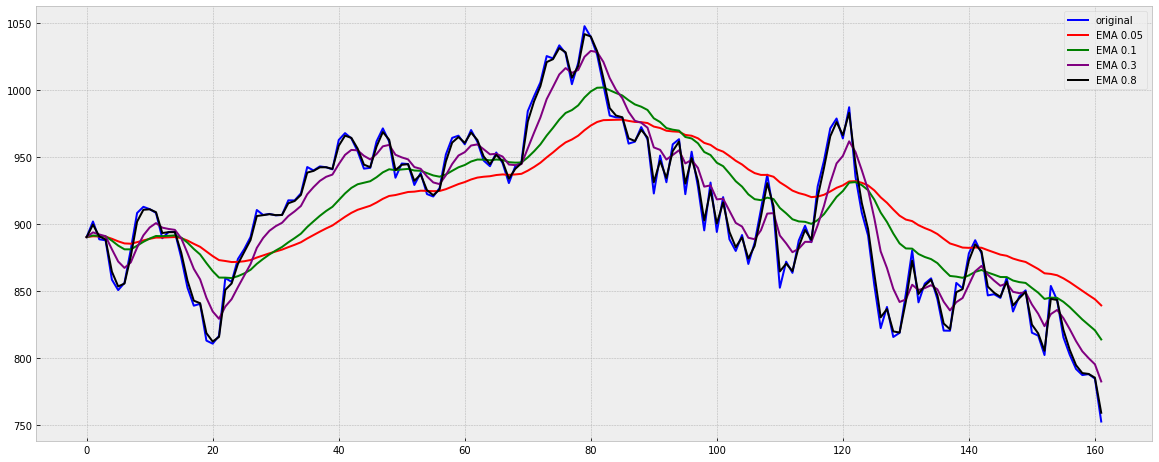

In [34]:
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(20, 8))
    plt.plot(dow_non_stat["a"], color='blue',label='original')
    for i in range(len(alphas)):
        ser = exponential_moving_average(dow_non_stat["a"], alphas[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.legend()

In [35]:
# EMA stationary

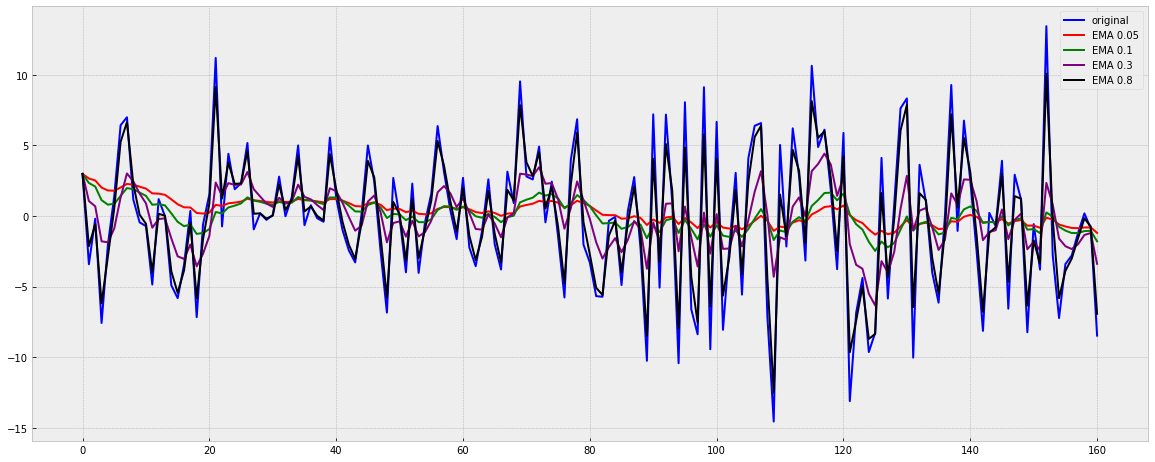

In [36]:
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(20, 8))
    plt.plot(dow_stat["a"], color='blue',label='original')
    for i in range(len(alphas)):
        ser = exponential_moving_average(dow_stat["a"], alphas[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.legend()

In [37]:
def exponential_moving_average(series, alpha, n_pred=None):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n-1] + (1 - alpha) * result[n-1])
    if not n_pred:
        return pd.Series(result)
    
    predictions = [alpha * series[len(series) - 1] + (1 - alpha) * result[-1]]

    for _ in range(n_pred):
        res = alpha * predictions[-1] + (1 - alpha) * result[-1]
        result.append(res)
        predictions.append(res)
    
    return series.append(pd.Series(predictions), ignore_index=True), pd.Series(result)

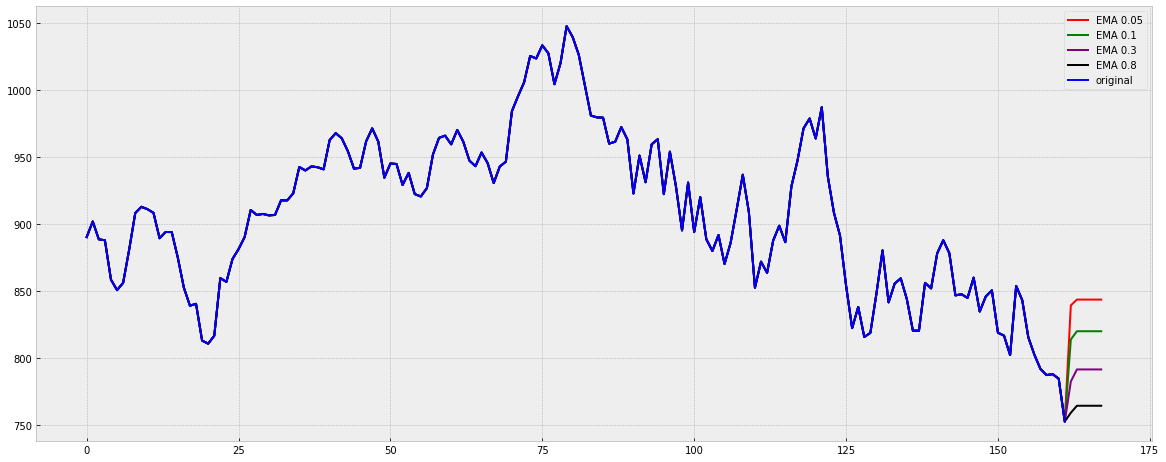

In [38]:
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(20, 8))
    for i in range(len(alphas)):
        ser, _ = exponential_moving_average(dow_non_stat["a"], alphas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.plot(dow_non_stat["a"], color='blue',label='original')
    plt.legend()

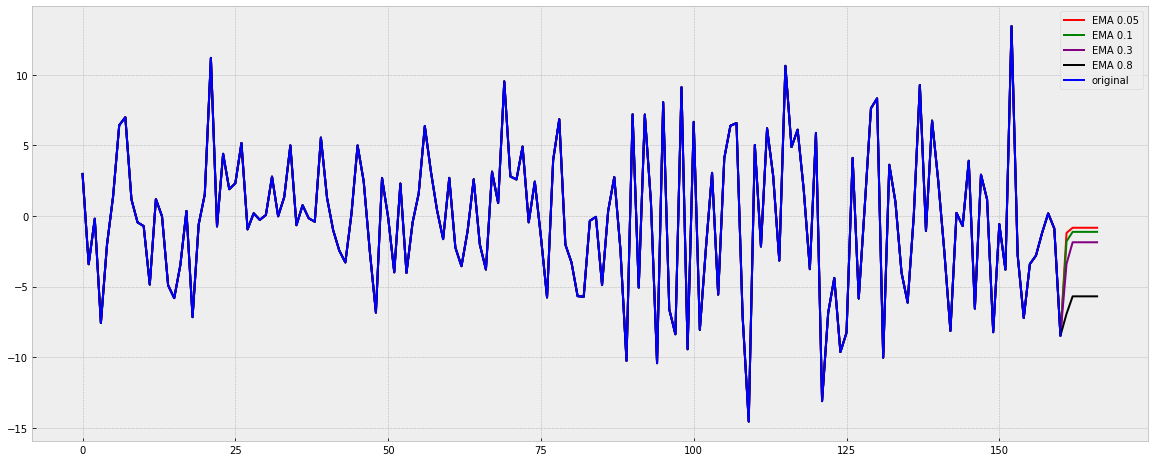

In [39]:
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(20, 8))
    for i in range(len(alphas)):
        ser, _ = exponential_moving_average(dow_stat["a"], alphas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.plot(dow_stat["a"], color='blue',label='original')
    plt.legend()

# Double EMA

In [40]:
def double_ema_with_preds(series, alpha, beta, n_preds):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        
    preds = []
    for n in range(n_preds):
        value = result[-1]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        preds.append(level+trend)

    return series.append(pd.Series(preds), ignore_index=True), pd.Series(result)

In [41]:
# DEMA non stat

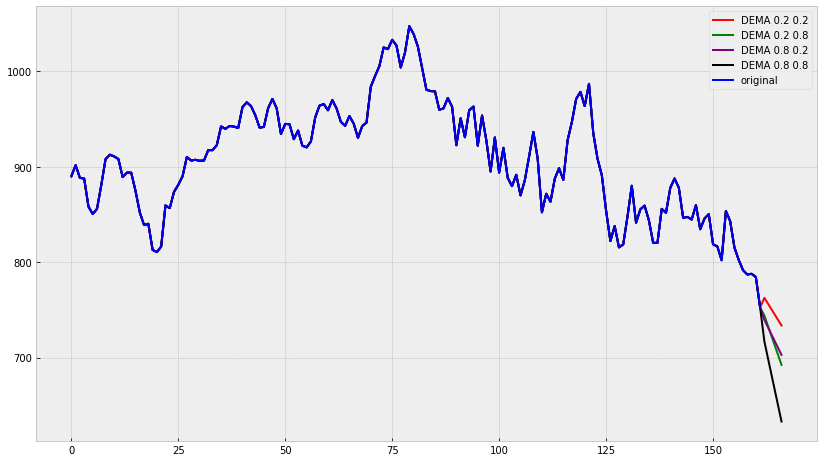

In [42]:
alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = double_ema_with_preds(dow_non_stat["a"], alphas[i], bettas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(dow_non_stat["a"], color='blue',label='original')
    plt.legend()

In [43]:
# DEMA stat

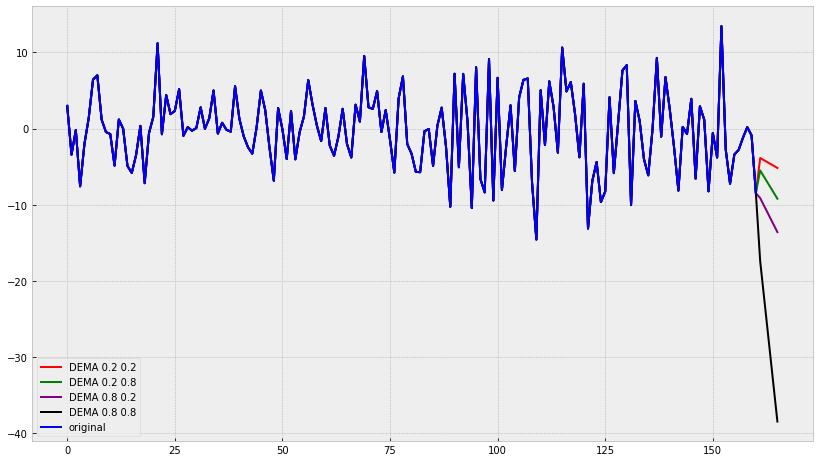

In [44]:
alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = double_ema_with_preds(dow_stat["a"], alphas[i], bettas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(dow_stat["a"], color='blue',label='original')
    plt.legend()

# Triple EMA

In [45]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

In [46]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [47]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [48]:
def plot_tema(alpha, beta, gamma, ser, ser_to_plot, n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

In [49]:
# Triple EMA non stat

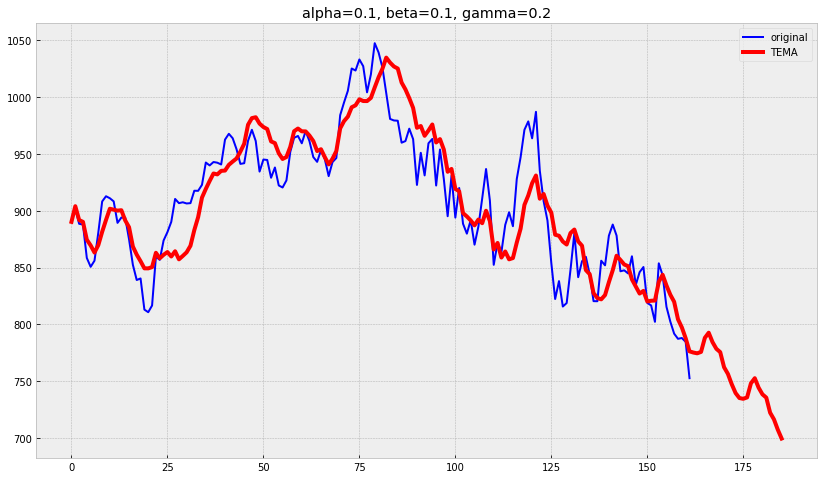

In [50]:
plot_tema(0.1, 0.1, 0.2, dow_non_stat['a'], dow_non_stat['a'])

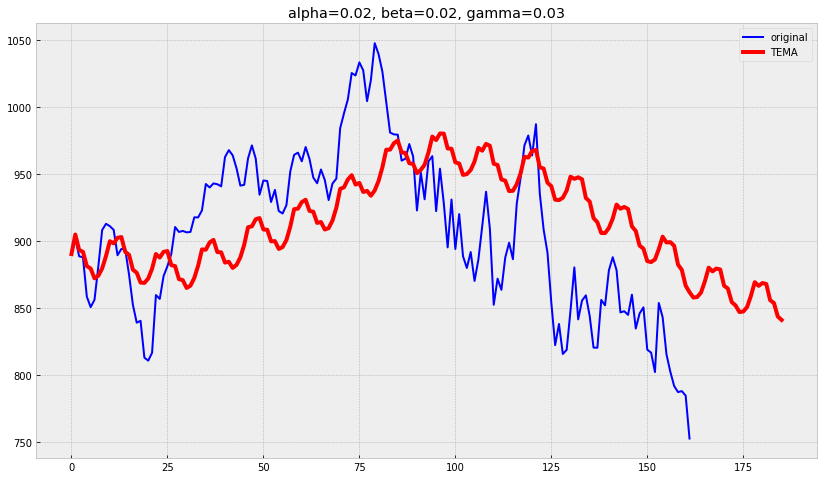

In [51]:
plot_tema(0.02, 0.02, 0.03, dow_non_stat['a'], dow_non_stat['a'])

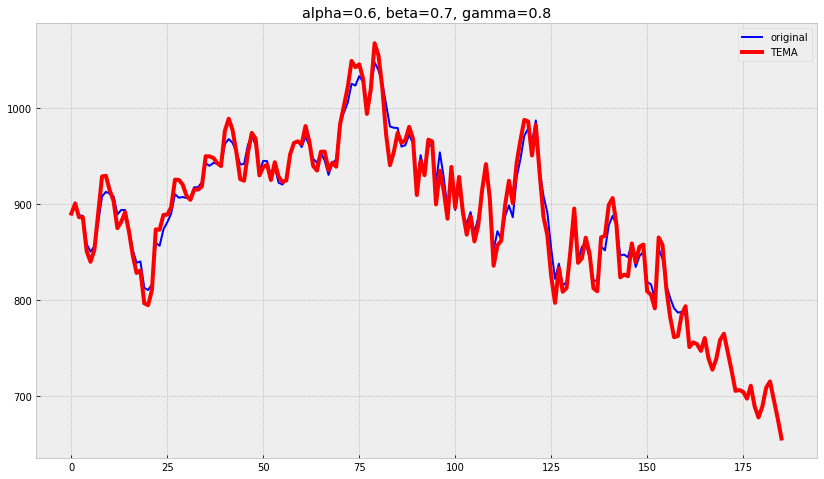

In [52]:
plot_tema(0.6, 0.7, 0.8, dow_non_stat['a'], dow_non_stat['a'])

In [53]:
# Triple EMA  stat

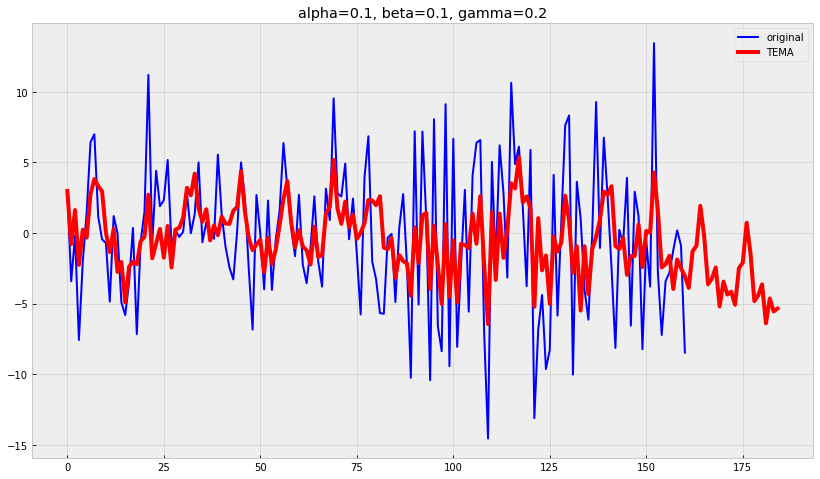

In [54]:
plot_tema(0.1, 0.1, 0.2, dow_stat['a'], dow_stat['a'])

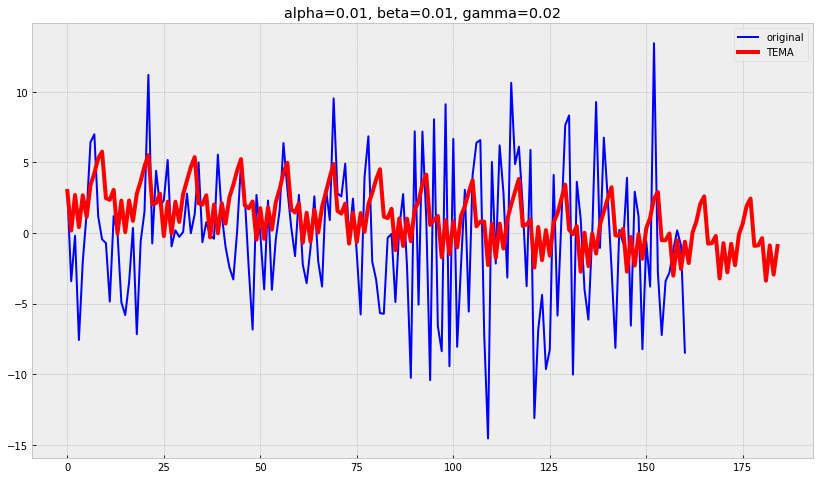

In [55]:
plot_tema(0.01, 0.01, 0.02, dow_stat['a'], dow_stat['a'])

# Подбор параметров

In [56]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [57]:
series_ns = dow_non_stat["a"]
series_s = dow_stat["a"]

In [58]:
train_ns, test_ns, val_ns = series_ns[:60], series_ns[60:70], series_ns[70:]
train_s, test_s, val_s = series_s[:60], series_s[60:70], series_s[70:]

In [59]:
#Parameter choose non stat

In [60]:
def mse_ns(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train_ns, 12, alpha, beta, gamma, len(test_ns))
    predictions = result[-len(test_ns):]
    error = mean_squared_error(predictions, test_ns)
    return error

In [61]:
opt_ns = minimize(mse_ns, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [62]:
alpha_opt_ns, beta_opt_ns, gamma_opt_ns = opt_ns.x
print(opt_ns)

      fun: 52.34596773292121
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.68434189e-06, -2.86348723e-04,  1.00186526e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 148
      nit: 22
   status: 0
  success: True
        x: array([0.36875562, 0.01203394, 0.38617872])


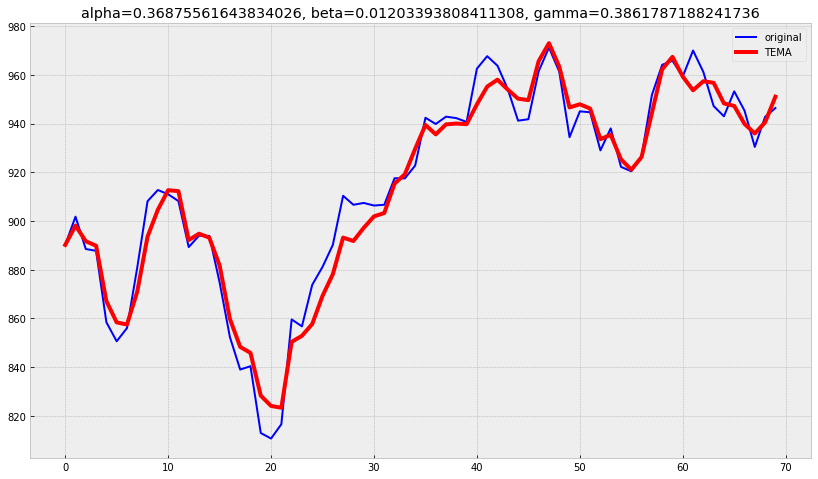

In [63]:
plot_tema(alpha_opt_ns, beta_opt_ns, gamma_opt_ns, ser=train_ns, ser_to_plot=series_ns[:70], n_preds=len(test_ns))

In [64]:
#Parameter choose stat

In [65]:
def mse_s(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train_s, 12, alpha, beta, gamma, len(test_s))
    predictions = result[-len(test_s):]
    error = mean_squared_error(predictions, test_s)
    return error

In [66]:
opt_s = minimize(mse_s, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [67]:
alpha_opt_s, beta_opt_s, gamma_opt_s = opt_s.x
print(opt_s)

      fun: 8.674372312524309
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.45168845, 52.87660034,  0.        ])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
   status: 0
  success: True
        x: array([1., 0., 1.])


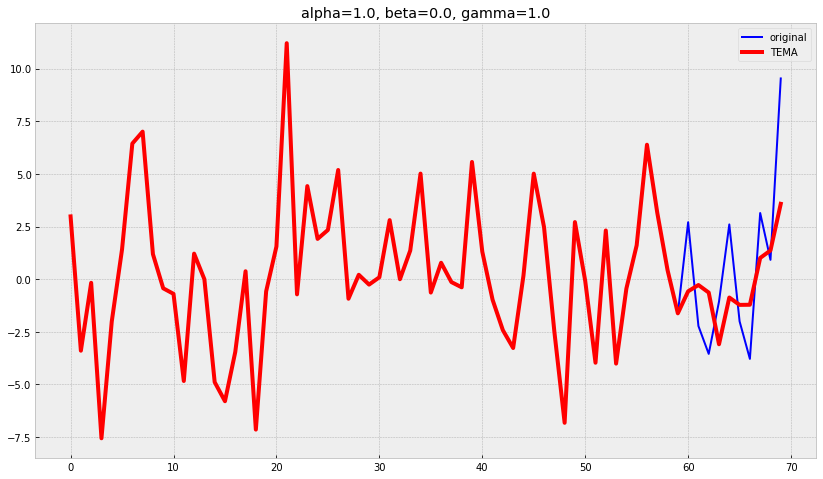

In [68]:
plot_tema(alpha_opt_s, beta_opt_s, gamma_opt_s, ser=train_s, ser_to_plot=series_s[:70], n_preds=len(test_s))

## Предполагаю, что для данного ряда оптимально выглядит triple EMA, причем на мой взгляд для нестационарного ряда она достаточно точно улавливает тренд. Стационарный ряд той же моделью на мой взгляд очень сильно обобщается. Все другие модели выглядят не очень подходящими.

Если возможно, в комментариях уточнить, это я что-то неправильно интерпретирую, или неподходящие комбинации модель/ряд?